In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("/Users/yakupakyniyazov/Downloads/credit_card.csv",)
df.drop(columns="index",inplace=True)
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [78]:
df.shape

(26052, 6)

In [79]:
df.isnull().sum()

City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

1 - What is the distribution of transaction amounts? <br>
2 - How do transaction amounts vary by card type? <br>
3 - What are the top 10 cities by total transaction amount?<br>
4 - How does the distribution of transaction amounts differ between genders?<br>
5 - What is the trend of transaction amounts over time?<br>
6 - What are the most common types of expenses?<br>
7 - How does the distribution of transaction amounts differ between expense types?<br>
8 - Are there any correlations between transaction amounts and other variables such as card type or gender?<br>
9 - How do transaction amounts vary across different cities?<br>
10 -Is there any seasonality in transaction amounts?<br>

<h1>What is the distribution of transaction amounts?</h1><h3>Histogram or density plot for distribution of transaction amounts.</h3>


count     26052.000000
mean     156411.537425
std      103063.254287
min        1005.000000
25%       77120.250000
50%      153106.500000
75%      228050.000000
max      998077.000000
Name: Amount, dtype: float64


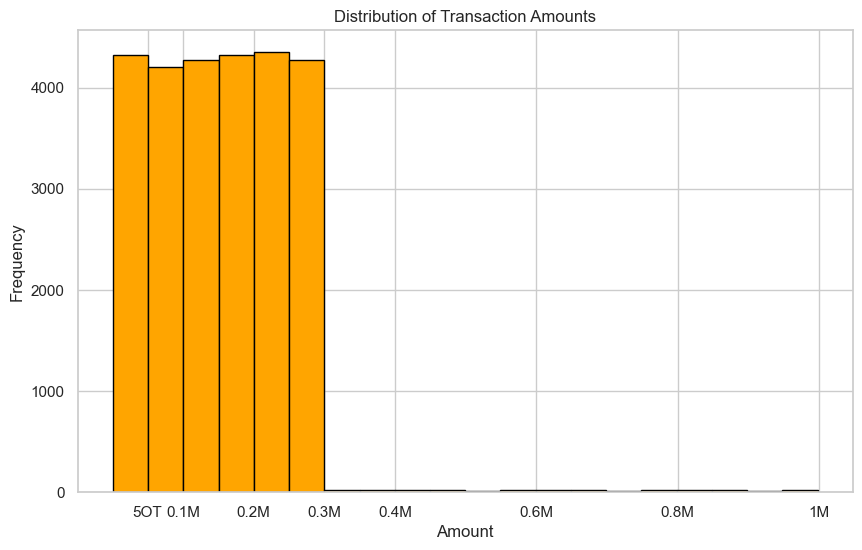

In [80]:
transaction =df["Amount"].describe()
print(transaction)
costum_ticks = [50_000,100_000,200_000,300_000,400_000,600_000,800_000,1_000_000]
custom_labels = ['5OT', '0.1M', '0.2M','0.3M', '0.4M', '0.6M', '0.8M','1M']
plt.figure(figsize =(10,6))
plt.hist(df["Amount"],bins=20,color="orange",edgecolor ="black")
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)

plt.xticks(costum_ticks, custom_labels)
plt.show();

<h1>2 - How do transaction amounts vary by card type?</h1>
Box plot or violin plot to compare transaction amounts by card type or gender.

In [81]:
transactions_amount=df["Card Type"].value_counts()
index =transactions_amount.index
value =transactions_amount.values
transactions_amount

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

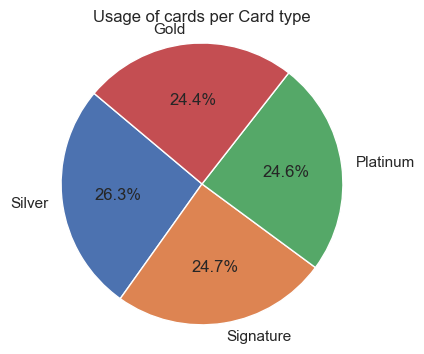

In [82]:
plt.figure(figsize=(4, 4))
plt.pie(value , labels=index, autopct='%1.1f%%', startangle=140)
plt.title('Usage of cards per Card type')
plt.axis('equal')  
plt.show()

In [83]:
car_amounts= df.groupby("Card Type")["Amount"].mean().reset_index()
car_amounts

,Card Type,Amount
0,Gold,154631.621800
1,Platinum,157492.813223
2,Signature,157133.721886
3,Silver,156376.273830


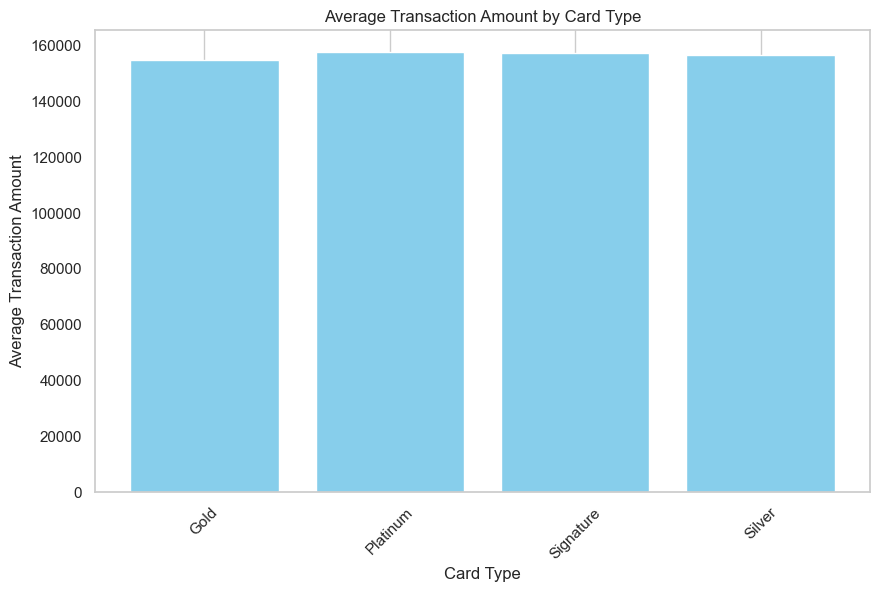

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(car_amounts['Card Type'], car_amounts['Amount'], color='skyblue')
plt.title('Average Transaction Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.show();

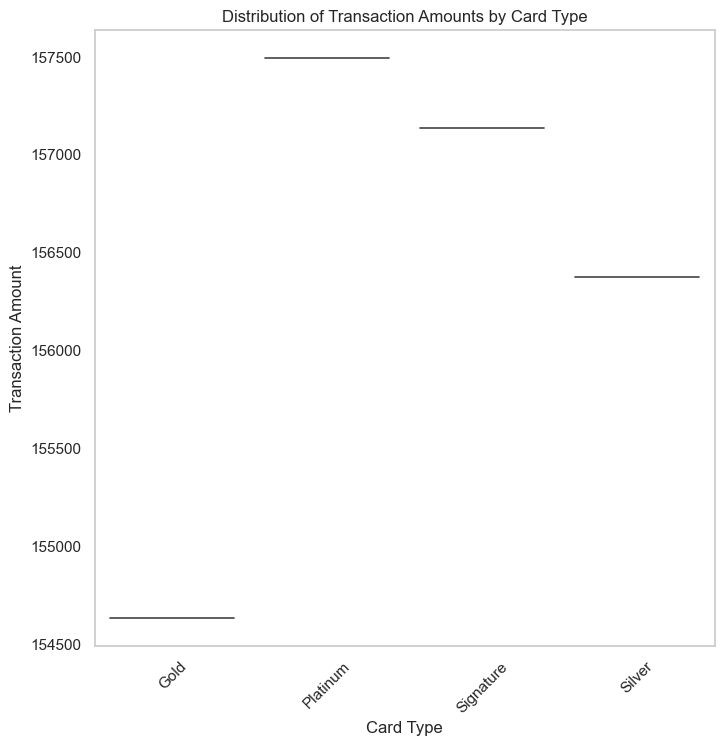

In [85]:
plt.figure(figsize=(8, 8))
sns.violinplot(y='Amount',x='Card Type', data=car_amounts)
plt.title('Distribution of Transaction Amounts by Card Type')
plt.title('Distribution of Transaction Amounts by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on y-axis
plt.show()

<h1>3 - What are the top 10 cities by total transaction amount?</h1>
Bar chart for top cities by total transaction amount.

In [86]:
df["City"] = df["City"].str.split(",",expand=True)[0]
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


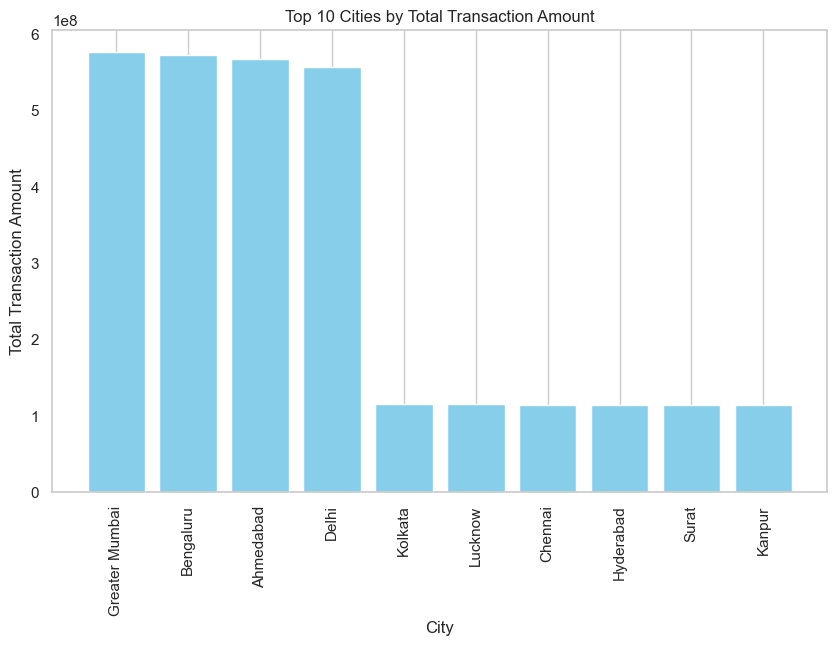

In [87]:
total_city = df.groupby("City")["Amount"].sum().reset_index()
top_10_city = total_city.nlargest(10,"Amount")
# top_20_city
plt.figure(figsize=(10, 6))
plt.bar(top_10_city['City'], top_10_city['Amount'], color='skyblue')
plt.title('Top 10 Cities by Total Transaction Amount')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on y-axis
plt.show()

<h1> 4 - How does the distribution of transaction amounts differ between genders?</h1>
Line plot for trend of transaction amounts over time.

In [88]:
gender = df.groupby("Gender")["Amount"].sum()
gender

Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64

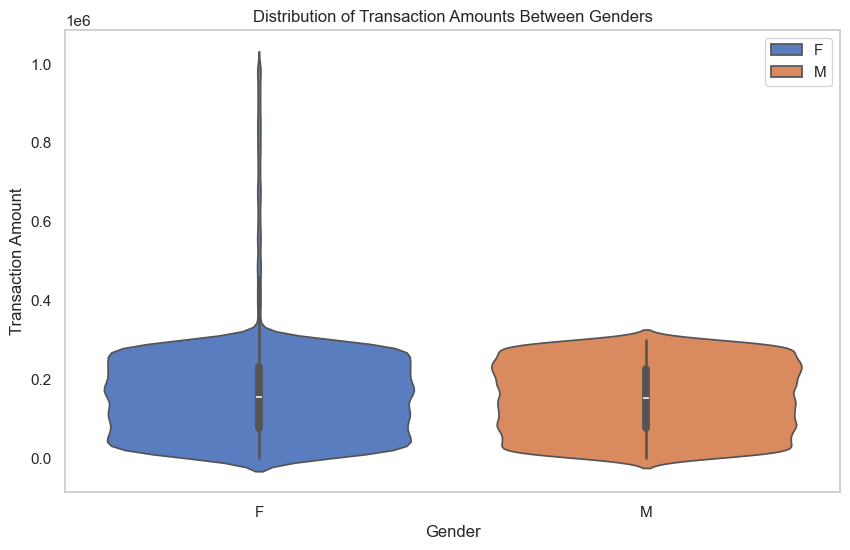

In [89]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Amount', data=df, hue='Gender', palette='muted', legend=True)
plt.title('Distribution of Transaction Amounts Between Genders')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.legend(loc='best', title=None)
plt.grid(axis='y')  # Add gridlines on y-axis
plt.show()

<h1>5 - What is the trend of transaction amounts over time?</h1>
Pie chart or bar chart for distribution of expense types.

In [90]:
# df["Date"]=pd.to_datetime(df["Date"],format='%Y-%m-%d')
# df.info()

In [91]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


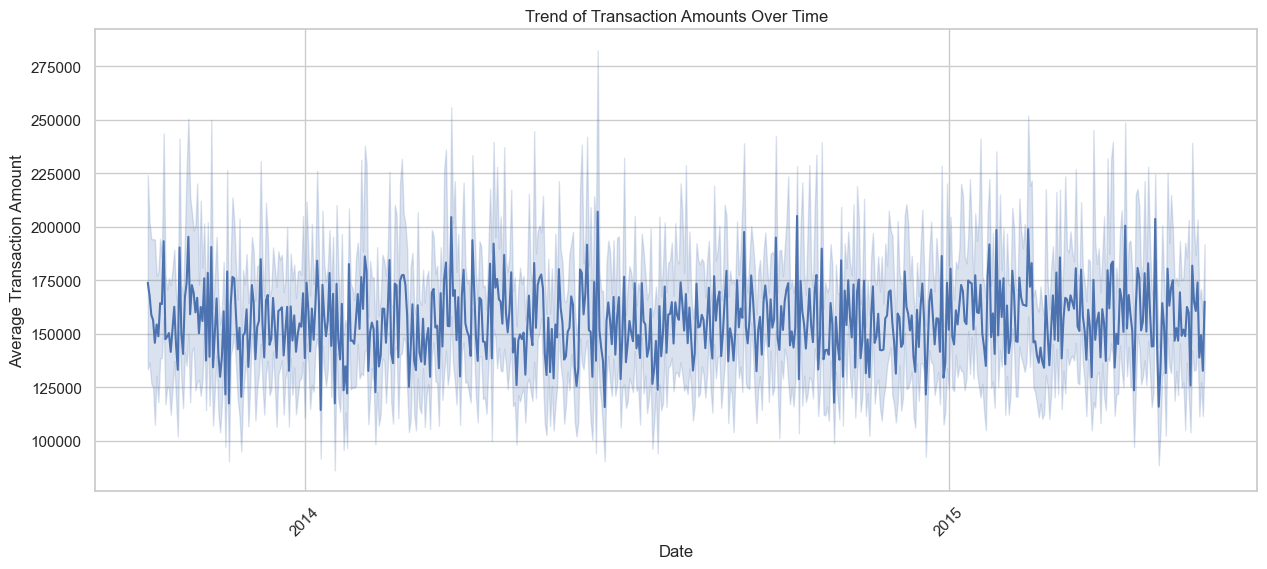

In [107]:
df['Date'] = pd.to_datetime(df['Date'])

# Plot the trend of transaction amounts over time using seaborn's lineplot
plt.figure(figsize=(15,6))
sns.lineplot(x="Date", y="Amount", data=df, estimator="mean")
plt.title('Trend of Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())  # Set x-axis ticks to show every year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format x-axis tick labels as year
plt.grid(True)
plt.show()

<h1>6 - What are the most common types of expenses?</h1>
Box plot or violin plot to compare transaction amounts by expense type.

In [93]:
df["Exp Type"].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

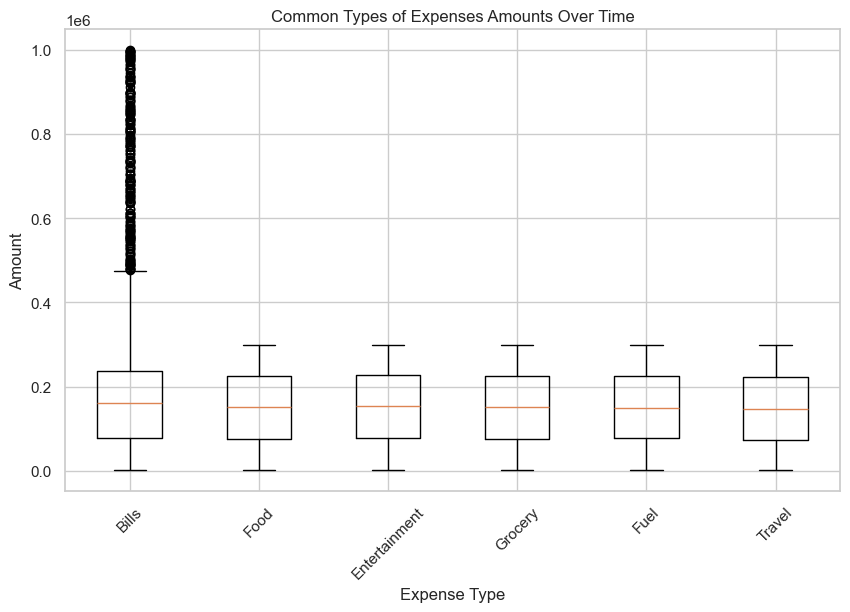

In [94]:
plt.figure(figsize=(10,6))
plt.boxplot([df[df["Exp Type"] == exp]["Amount"] for exp in df["Exp Type"].unique()],
            labels=df["Exp Type"].unique())
plt.title('Common Types of Expenses Amounts Over Time')
plt.xlabel('Expense Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [95]:
expense_type=df.groupby("Exp Type")["Amount"].mean().sort_values(ascending=False)

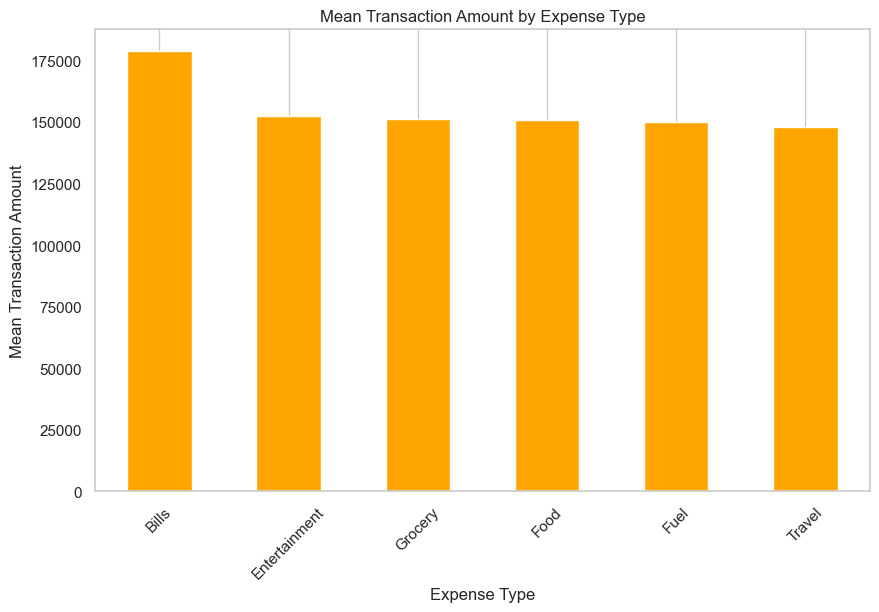

In [96]:
plt.figure(figsize=(10,6))
expense_type.plot(kind="bar", color='orange')
plt.title('Mean Transaction Amount by Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on y-axis
plt.show()

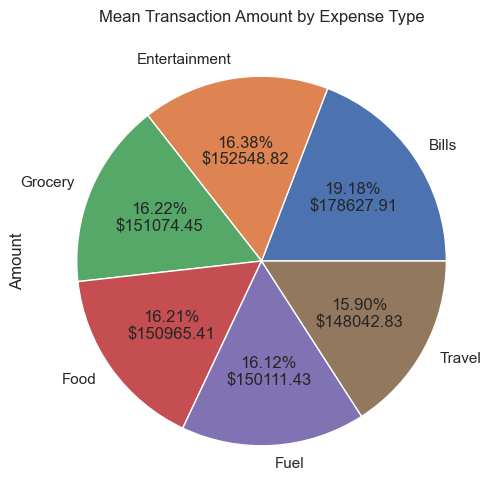

In [97]:
plt.figure(figsize=(15,6))
expense_type.plot(kind="pie", autopct=lambda p: '{:.2f}%\n${:.2f}'.format(p, p * sum(expense_type) / 100))
plt.title('Mean Transaction Amount by Expense Type')
plt.show()

<h1>7 - How does the distribution of transaction amounts differ between expense types? </h1>
Scatter plot to explore correlations between transaction amounts and other variables

In [98]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


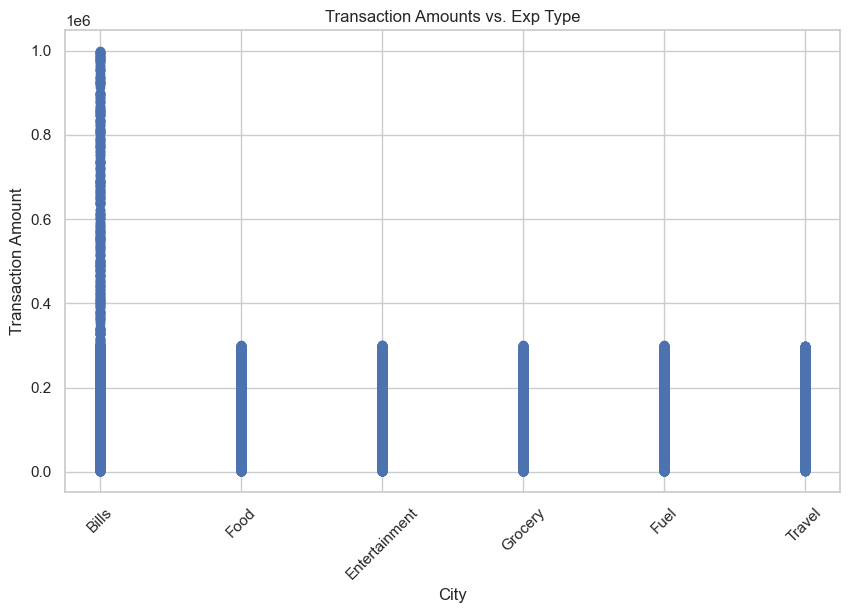

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(df["Exp Type"],df["Amount"])
plt.title('Transaction Amounts vs. Exp Type')
plt.xlabel('City')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

<h1>8 - Are there any correlations between transaction amounts and other variables such as card type or gender? </h1>


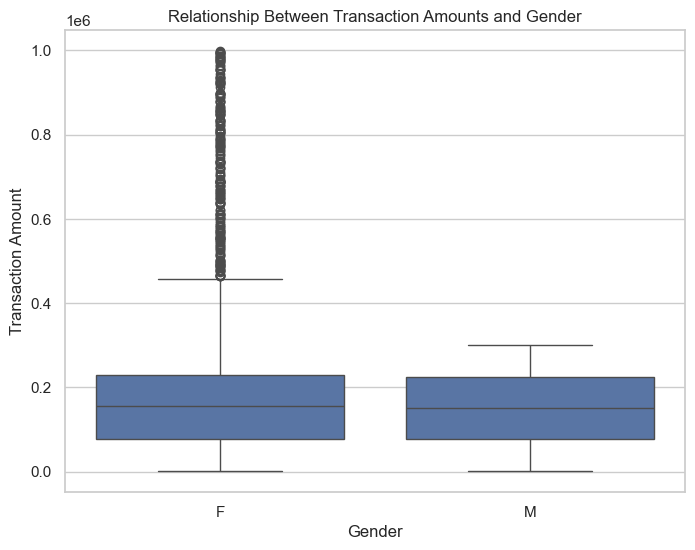

In [100]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="Amount", data=df)
plt.title('Relationship Between Transaction Amounts and Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.show()

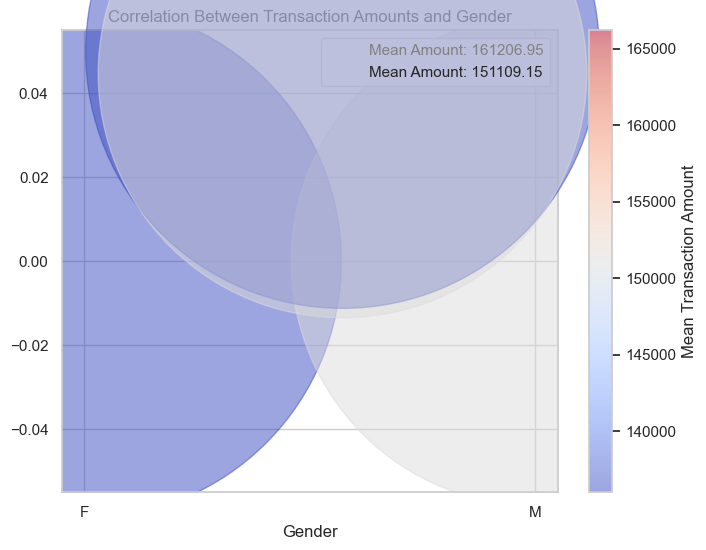

In [101]:
grouped_data = df.groupby('Gender').agg({'Amount': ['mean', 'count']}).reset_index()

# Plot the bubble chart
plt.figure(figsize=(8, 6))
for i, row in grouped_data.iterrows():
    plt.scatter(row['Gender'], 0, s=row[('Amount', 'count')] * 10, alpha=0.5,
                c=row[('Amount', 'mean')], cmap='coolwarm', label=f"Mean Amount: {row[('Amount', 'mean')]:.2f}")
plt.title('Correlation Between Transaction Amounts and Gender')
plt.xlabel('Gender')
plt.ylabel('')
plt.colorbar(label='Mean Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

###  How do transaction amounts vary across different cities?

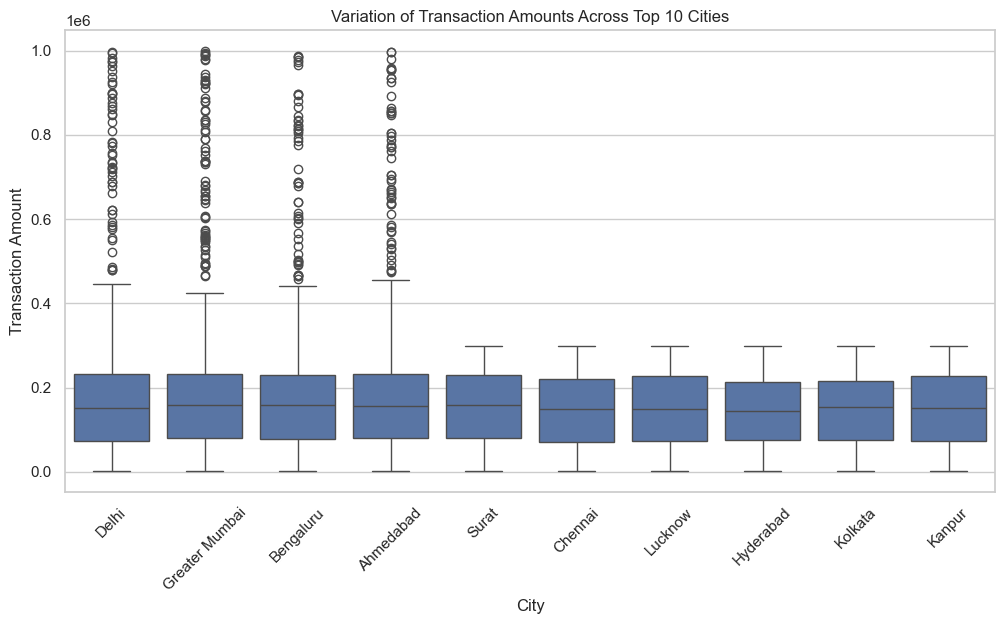

In [102]:
city_transaction_total = df.groupby('City')['Amount'].sum()

# Select the top 10 cities based on total transaction amount
top_10_cities = city_transaction_total.nlargest(10).index

# Filter the DataFrame to include only transactions from the top 10 cities
df_top_10 = df[df['City'].isin(top_10_cities)]

# Create a box plot or violin plot to visualize the distribution of transaction amounts across the top 10 cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Amount', data=df_top_10)
# or sns.violinplot(x='city', y='Amount', data=df_top_10)
plt.title('Variation of Transaction Amounts Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<h1>10 -Is there any seasonality in transaction amounts? </h1>

In [74]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,month,year
0,Delhi,2014-10-29,Gold,Bills,F,82475,10,2014
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,8,2014
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,8,2014
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,4,2014
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,5,2015


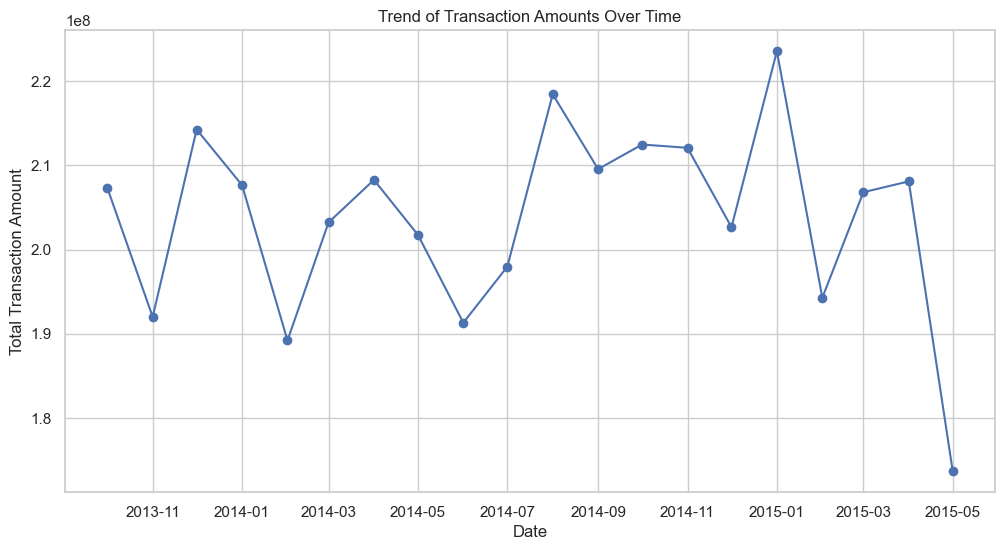

In [104]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Group the data by month and year and calculate the total transaction amount for each month
monthly_transaction_total = df.groupby(['year', 'month'])['Amount'].sum()

# Reset index to make 'year' and 'month' as columns
monthly_transaction_total = monthly_transaction_total.reset_index()

# Combine 'year' and 'month' columns into a single datetime column
monthly_transaction_total['Date'] = pd.to_datetime(monthly_transaction_total[['year', 'month']].assign(day=1))

# Create a line plot to visualize the trend of transaction amounts over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_transaction_total['Date'], monthly_transaction_total['Amount'], marker='o')
plt.title('Trend of Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

In [105]:
# Convert the 'Date' column to datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Find the first and last dates in the 'Date' column
first_date = df['Date'].min()
last_date = df['Date'].max()

print("First Date:", first_date)
print("Last Date:", last_date)

First Date: 2013-10-04 00:00:00
Last Date: 2015-05-26 00:00:00


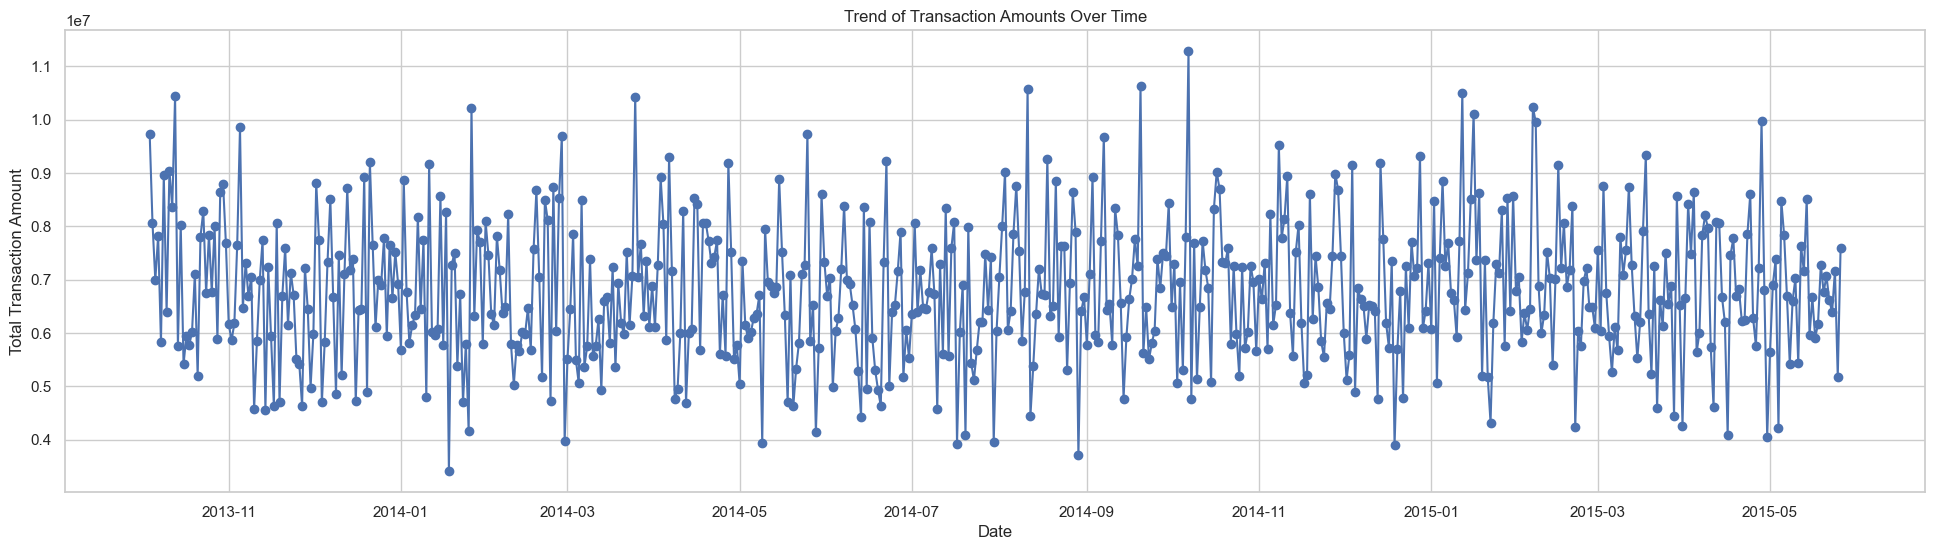

In [109]:
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the total transaction amount for each date
daily_transaction_total = df.groupby('Date')['Amount'].sum()

# Plot the trend of transaction amounts over time using a line plot
plt.figure(figsize=(24, 6))
plt.plot(daily_transaction_total.index, daily_transaction_total.values, marker='o', linestyle='-')
plt.title('Trend of Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()